# LANL Earhquake prediction

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.10f}'.format
pd.options.display.max_rows = 4000

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
sns.set()

In [3]:
FEATURES_BASE = '../data/processed/train/features_base.csv'
FEATURES_BASE_DENOISE = '../data/processed/train/features_base_denoise.csv'
FEATURES_FOLDS_DENOISE = '../data/processed/train/features_folds_denoise.csv'
FEATURES_TSFRESH = '../data/processed/train/features_tsfresh.csv'

In [4]:
features_base = pd.read_csv(FEATURES_BASE,index_col='id').add_prefix('b_')
features_base_denoise = pd.read_csv(FEATURES_BASE_DENOISE,index_col='id').add_prefix('bd_')
features_folds_denoise = pd.read_csv(FEATURES_FOLDS_DENOISE,index_col='id').add_prefix('fd_')
features_tsfresh = pd.read_csv(FEATURES_TSFRESH,index_col='id').add_prefix('ts_')

In [7]:
y_all = features_base['b_y']
X_all = features_base.drop('b_y',axis=1).join(features_base_denoise.drop('bd_y',axis=1)).join(features_folds_denoise.drop('fd_y',axis=1)).join(features_tsfresh.drop('ts_y',axis=1))
# X_all = features_folds_denoise.drop('y',axis=1).join(feature.drop('y',axis=1))
# X_all = data_s.drop('y',axis=1)
# X_all = data_d_f.drop('y',axis=1).join(data_s.drop('y',axis=1),rsuffix='s_').join(data_f.drop('y',axis=1),rsuffix='f_')
# X_all = data_f.drop('y',axis=1).join(data_s.drop('y',axis=1),rsuffix='s_')

In [8]:
print('features_base.shape:',features_base.shape)
print('features_base_denoise.shape:',features_base_denoise.shape)
print('features_folds_denoise.shape:',features_folds_denoise.shape)
print('features_tsfresh.shape:',features_tsfresh.shape)
print('X_all.shape:',X_all.shape)

features_base.shape: (4194, 116)
features_base_denoise.shape: (4194, 116)
features_folds_denoise.shape: (4194, 1151)
features_tsfresh.shape: (4194, 789)
X_all.shape: (4194, 2168)


## Cleaning from NaN,infinity or too large values

In [9]:
if np.any(np.isnan(X_all)):
    X_all.fillna(0,inplace=True)

## KMeans

In [11]:
from sklearn.cluster import KMeans

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_all)
    Sum_of_squared_distances.append(km.inertia_)
    print(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
k = 4
km = KMeans(n_clusters=k)
km = km.fit(X_all)

In [13]:
series = pd.Series(data=km.labels_, name='class', index=X_all.index)
series.index = X_all.index
dfc = series.to_frame()

In [14]:
X_all['class'] = dfc['class']

In [15]:
X_all['y'] = y_all

In [16]:
X_all[X_all['class']==0]['y'].describe()

count   2,152.0000000000
mean        7.5947143291
std         3.4823795777
min         0.0063976572
25%         5.2956211057
50%         7.5121963388
75%        10.0837965057
max        16.1031955670
Name: y, dtype: float64

In [17]:
X_all[X_all['class']==1]['y'].describe()

count   1,587.0000000000
mean        3.9943941317
std         2.7137515781
min         0.1537976851
25%         1.7771476601
50%         3.5357961838
75%         5.6845963515
max        15.0114983120
Name: y, dtype: float64

In [18]:
X_all[X_all['class']==2]['y'].describe()

count   44.0000000000
mean     1.8774297315
std      2.3519990194
min      0.2788989459
25%      0.3053990398
50%      0.6546979748
75%      2.5648725089
max      8.8552977079
Name: y, dtype: float64

In [19]:
X_all[X_all['class']==3]['y'].describe()

count   411.0000000000
mean      2.5978146682
std       1.9937060803
min       0.2443965221
25%       1.1515980530
50%       2.1739963300
75%       3.3114461549
max      12.1674967780
Name: y, dtype: float64

In [29]:
X_all[X_all['bd_max']>=5100]['y'].describe()

count   2.0000000000
mean    0.3136986919
std     0.0063622986
min     0.3091998674
25%     0.3114492797
50%     0.3136986919
75%     0.3159481041
max     0.3181975164
Name: y, dtype: float64

In [31]:
for name in X_all.columns.values:
    print(name)

b_ave
b_std
b_max
b_min
b_q90
b_q95
b_q99
b_q05
b_q10
b_q01
b_abs_max
b_abs_mean
b_abs_std
b_trend
b_abs_trend
b_ave_roll_std_10
b_std_roll_std_10
b_max_roll_std_10
b_min_roll_std_10
b_q01_roll_std_10
b_q05_roll_std_10
b_q10_roll_std_10
b_q95_roll_std_10
b_q99_roll_std_10
b_ave_roll_mean_10
b_std_roll_mean_10
b_max_roll_mean_10
b_min_roll_mean_10
b_q01_roll_mean_10
b_q05_roll_mean_10
b_q95_roll_mean_10
b_q99_roll_mean_10
b_ave_roll_abs_mean_10
b_std_roll_abs_mean_10
b_max_roll_abs_mean_10
b_min_roll_abs_mean_10
b_q01_roll_abs_mean_10
b_q05_roll_abs_mean_10
b_q95_roll_abs_mean_10
b_q99_roll_abs_mean_10
b_ave_roll_std_50
b_std_roll_std_50
b_max_roll_std_50
b_min_roll_std_50
b_q01_roll_std_50
b_q05_roll_std_50
b_q10_roll_std_50
b_q95_roll_std_50
b_q99_roll_std_50
b_ave_roll_mean_50
b_std_roll_mean_50
b_max_roll_mean_50
b_min_roll_mean_50
b_q01_roll_mean_50
b_q05_roll_mean_50
b_q95_roll_mean_50
b_q99_roll_mean_50
b_ave_roll_abs_mean_50
b_std_roll_abs_mean_50
b_max_roll_abs_mean_50
b_min_ro

In [88]:
X_all[X_all['ts_x__maximum']>100]
# X_all[X_all['y']<0.04]
# X_all['b_max'].max()
# X_all[(X_all['b_max']>1000) & (X_all['fd_f_2_max']>1000)]

b_ave          b_std            b_max             b_min  \
id                                                                    
0    4.8841133333   5.1010891269   104.0000000000    -98.0000000000   
1    4.7257666667   6.5888018192   181.0000000000   -154.0000000000   
2    4.9063933333   6.9673738088   140.0000000000   -106.0000000000   
3    4.9022400000   6.9222821128   197.0000000000   -199.0000000000   
4    4.9087200000   7.3010858527   145.0000000000   -126.0000000000   
5    4.9135133333   5.4340929991   142.0000000000   -144.0000000000   
6    4.8556600000   5.6878044356   120.0000000000    -78.0000000000   
7    4.5054266667   5.8544920546   139.0000000000   -134.0000000000   
8    4.7178333333   7.7896171476   168.0000000000   -156.0000000000   
9    4.7309600000   6.8904361844   152.0000000000   -126.0000000000   
10   4.5828733333   6.1572514439   245.0000000000   -115.0000000000   
11   4.3299333333  15.2539493464   410.0000000000   -478.0000000000   
12   4.4640400000   8.6604726706   224.0000000000   -169.0000000000   
13   4.6808133333   6.0333263245   139.0000000000   -129.0000000000   
15   4.5979533333   6.3284883775   126.0000000000   -117.0000000000   
16   4.5134866667   6.4801505726   145.0000000000   -162.0000000000   
17   4.4752400000   5.9980986106   101.0000000000   -120.0000000000   
18   4.5303266667   6.8315610925   120.0000000000   -117.0000000000   
19   4.4916466667   7.2981785551   140.0000000000   -189.0000000000   
20   4.4190533333   7.6894816234   146.0000000000   -123.0000000000   
21   4.6559333333   8.2023267916   229.0000000000   -251.0000000000   
22   4.5256000000  13.6782693096   313.0000000000   -595.0000000000   
23   4.4895666667   5.6667825509   108.0000000000    -63.0000000000   
25   4.5191933333   6.6230500237   115.0000000000   -102.0000000000   
26   4.6990466667   6.4193650068   131.0000000000   -106.0000000000   
27   4.3928533333   5.8135966715   118.0000000000   -104.0000000000   
28   4.6164666667   6.7481154541   194.0000000000   -172.0000000000   
29   4.4631666667 137.5040762183 3,252.0000000000 -4,621.0000000000   
30   4.3743333333   8.9861342016   159.0000000000   -142.0000000000   
31   4.3438533333   7.1895853996   220.0000000000   -247.0000000000   
37   4.3539133333   3.7926936803   119.0000000000    -87.0000000000   
38   4.2424666667   4.6850709616   152.0000000000   -121.0000000000   
40   4.3064066667   3.6144674510   133.0000000000   -113.0000000000   
42   4.3839733333   4.2227784470   139.0000000000   -102.0000000000   
47   4.4076266667   3.4426463417   101.0000000000    -79.0000000000   
48   4.5359666667   3.8632007108   136.0000000000   -154.0000000000   
50   4.8203733333   4.0842968706   103.0000000000   -104.0000000000   
51   4.7205066667   4.8353410921   170.0000000000    -99.0000000000   
52   4.4199933333   3.8966599715   111.0000000000    -76.0000000000   
55   4.5700533333   4.2301125908   125.0000000000   -110.0000000000   
59   4.3475866667   4.2579600173   214.0000000000   -134.0000000000   
61   4.4214000000   4.6523738070   123.0000000000   -123.0000000000   
63   4.4906400000   4.4867217866   197.0000000000    -84.0000000000   
65   4.4719600000   4.1276418318   124.0000000000   -120.0000000000   
75   4.4880266667   3.7490429853   127.0000000000   -112.0000000000   
76   4.9146666667   4.1943737978   124.0000000000    -99.0000000000   
78   4.7768400000   4.8031780744   123.0000000000   -154.0000000000   
79   4.6560800000   4.8221225306   157.0000000000   -134.0000000000   
80   4.7195600000   4.2492595519   150.0000000000   -114.0000000000   
81   4.8305466667   5.0675180218   136.0000000000   -120.0000000000   
84   4.5662733333   5.9223098966   152.0000000000   -143.0000000000   
85   4.5274866667   4.7058139023   185.0000000000   -120.0000000000   
86   4.6582800000   6.0078360587   273.0000000000   -237.0000000000   
87   4.3931600000   4.4919763892   119.0000000000   -128.0000000000   
88   4.4984133333   4.9322892740   2

In [79]:
X_all[X_all.index==36]

b_ave        b_std         b_max          b_min        b_q90  \
id                                                                       
36 4.4092533333 3.0450886756 38.0000000000 -37.0000000000 8.0000000000   

          b_q95         b_q99        b_q05        b_q10         b_q01  \
id                                                                      
36 9.0000000000 12.0000000000 0.0000000000 1.0000000000 -3.0000000000   

       ...       ts_x__time_reversal_asymmetry_statistic__lag_1  \
id     ...                                                        
36     ...                                        -0.1136415152   

    ts_x__time_reversal_asymmetry_statistic__lag_2  \
id                                                   
36                                    0.6788447692   

    ts_x__time_reversal_asymmetry_statistic__lag_3  \
id                                                   
36                                   -0.0463818553   

    ts_x__value_count__value_-1  ts_x__value_count__value_0  \
id                                                            
36             3,243.0000000000            5,971.0000000000   

    ts_x__value_count__value_1  ts_x__variance  \
id                                               
36            9,887.0000000000    9.2725650425   

    ts_x__variance_larger_than_standard_deviation  class            y  
id                                                                     
36                                   1.0000000000      0 0.0284955656  

[1 rows x 2170 columns]

In [48]:
SEG_DIR = '../data/interim/train/segments/'
SEG_TEMPLATE = 'seg_{segment_id}.csv'
SEG_PATH = SEG_DIR + SEG_TEMPLATE

def read_segment(segment_id):
    return pd.read_csv(SEG_PATH.format(segment_id=segment_id))

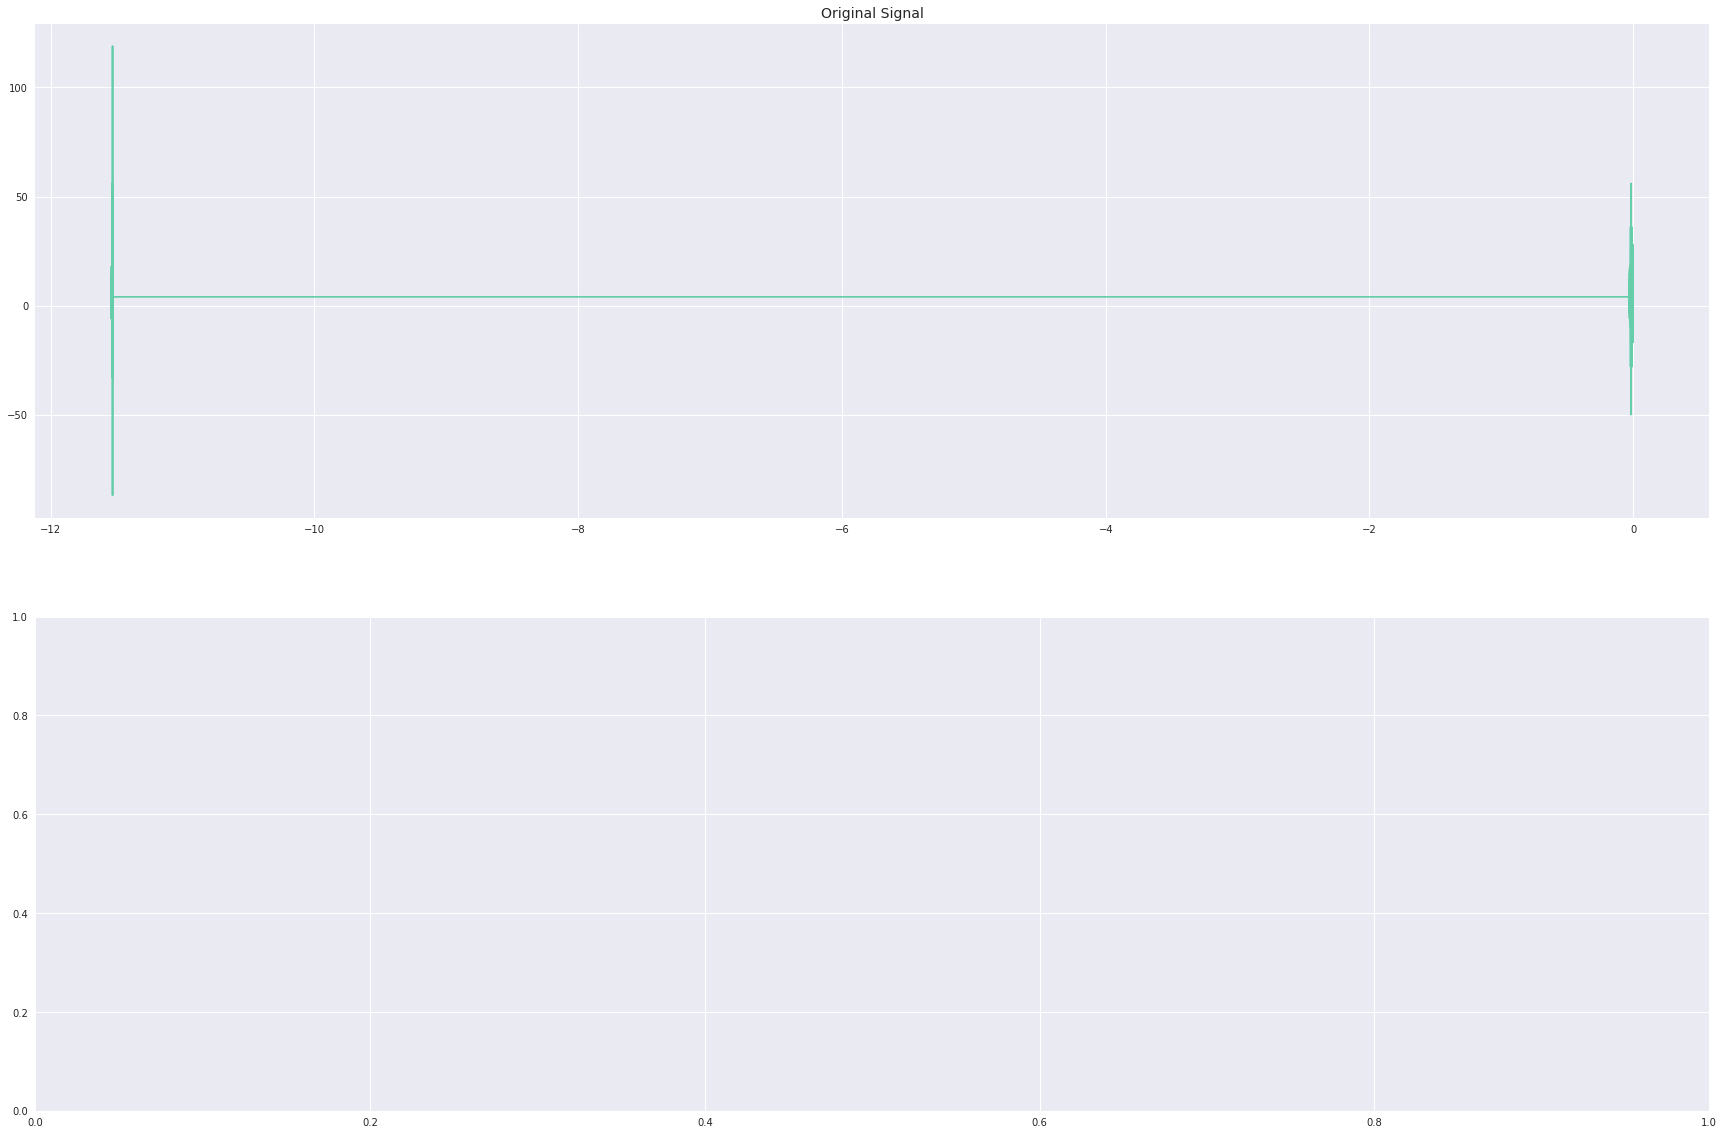

In [98]:
df = read_segment(37)
x = df['x'].values
y = df['y'].values

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))

ax[0].plot(0-y,x, 'mediumaquamarine')
ax[0].set_title('Original Signal', fontsize=14)
# ax[1].plot(DenoiseUtils.wavelet_filter(x,n=10,low_cutoff=100,sample_rate=1000000), 'seagreen')

plt.show()